## Week 3 Homework

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Perform PCA

In [2]:
%%bash

# Perform PCA using plink
plink --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
    --pca header \
    --allow-no-sex \
    --allow-extra-chr \
    --mind

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --mind
  --pca header
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
105 people removed due to missing genotype data (--mind).
IDs written to plink.irem .
Using up to 4 threads (change this with --threads).
Before main variant filters, 951 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%

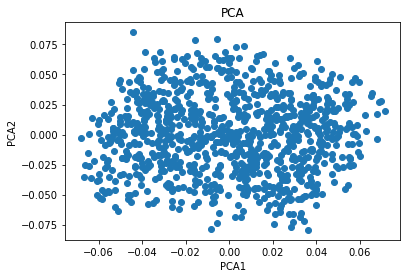

In [3]:
# Read in PCA output as pandas dataframe
pca_output = pd.read_csv("plink.eigenvec", sep = " ")

# Plot first two PCA components
fig, ax = plt.subplots()
ax.scatter(pca_output["PC1"], pca_output["PC2"])

ax.set_title("PCA")
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")

plt.show()

Visualize the allele frequency spectrum by plotting a histogram of allele frequencies.

## Visualize allele frequency spectrum

In [4]:
%%bash

# Calculate allele frequencies using plink
plink --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
    --freq \
    --allow-no-sex \
    --allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --allow-extra-chr
  --allow-no-sex
  --freq
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%

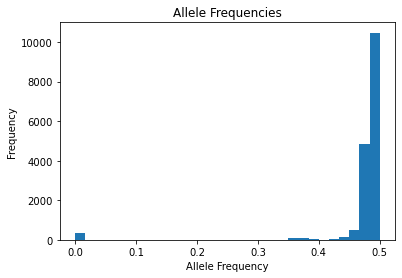

In [5]:
# Read in allele frequency data as pandas dataframe
frq_output = pd.read_csv("plink.frq", sep = "\s+")

# Plot histogram of allele frequencies
fig, ax = plt.subplots()
ax.hist(frq_output["MAF"], bins = 30)

ax.set_title("Allele Frequencies")
ax.set_xlabel("Allele Frequency")
ax.set_ylabel("Frequency")

plt.show()

## Perform quantitative association testing

In [6]:
# Read in phenotype data and separate subject ID into family and individual IDs
pheno_data = pd.read_csv("BYxRM_PhenoData.txt", sep = "\s+")
pheno_data.index.name = "subject_id"
pheno_data.reset_index(inplace = True)
pheno_data[["FID", "IID"]] = pheno_data.subject_id.str.split("_", expand = True)
cols = pheno_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
pheno_data = pheno_data[cols]
pheno_data.to_csv("BYxRM_PhenoData_tab.txt", sep = "\t", header = True, index = False, na_rep = "NA")

In [7]:
%%bash

# Perform quantitative association testing for all phenotypes
plink \
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
  --pheno BYxRM_PhenoData_tab.txt \
  --linear \
  --allow-no-sex \
  --covar plink.eigenvec \
  --covar-number 1-10 \
  --all-pheno \
  --allow-extra-chr

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --all-pheno
  --allow-extra-chr
  --allow-no-sex
  --covar plink.eigenvec
  --covar-number 1-10
  --linear
  --pheno BYxRM_PhenoData_tab.txt
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: plink-temporary.bed + plink-temporary.bim + plink-temporary.fam written.
16624 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
0 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 10 out of 20 covariates loaded.
105 people were not seen in the covariate file.
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%

## Create Manhattan plots and QQ plots

In [8]:
# Create list of all chromosomes (plink changes chrX to 23 and chrM to 26)
chr_list = ["chrI", "chrII", "chrIII", "chrIV", "chrV", 
            "chrVI", "chrVII", "chrVIII", "chrIX", "23", 
            "chrXI", "chrXII", "chrXIII", "chrXIV", "chrXV", 
           "chrXVI", "26"]

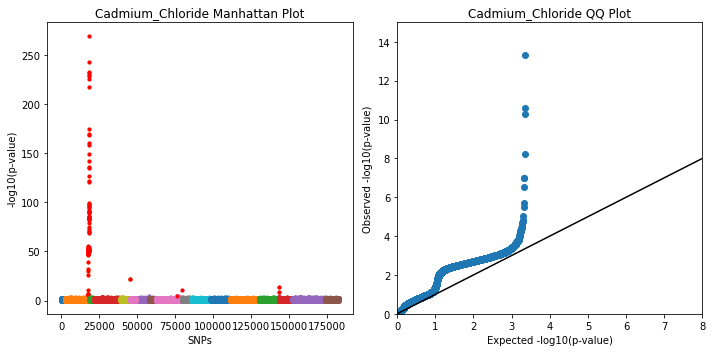

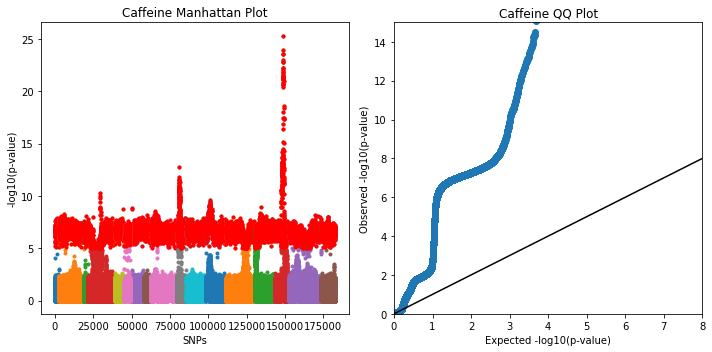

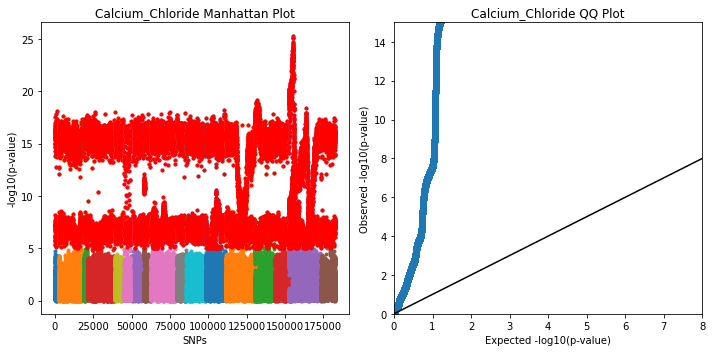

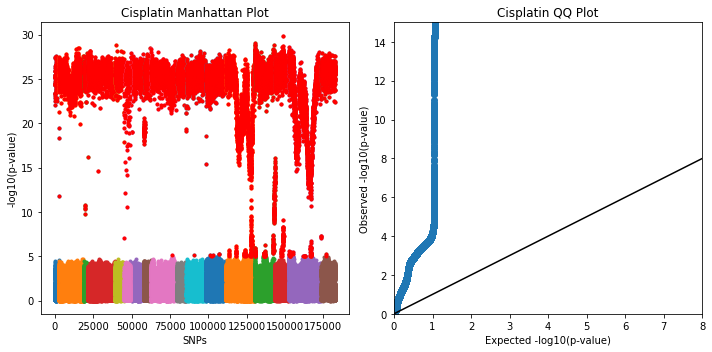

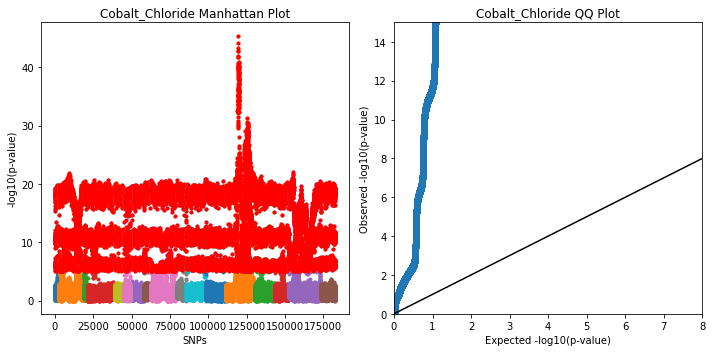

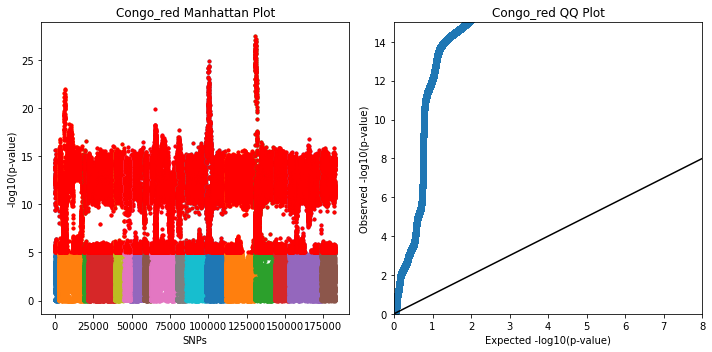

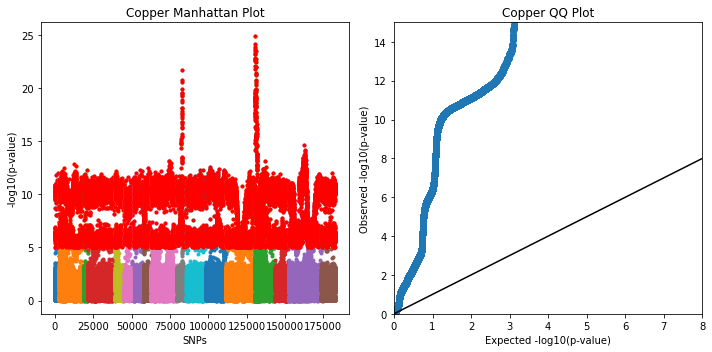

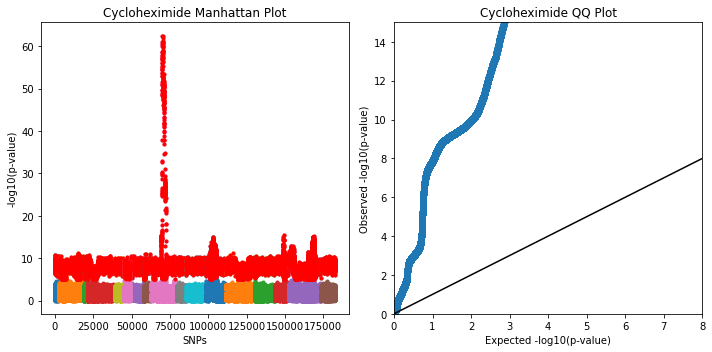

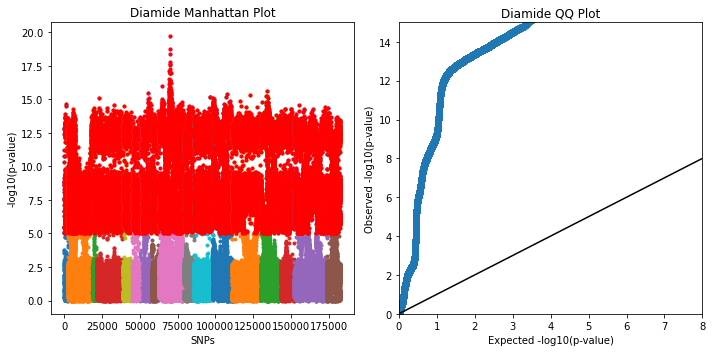

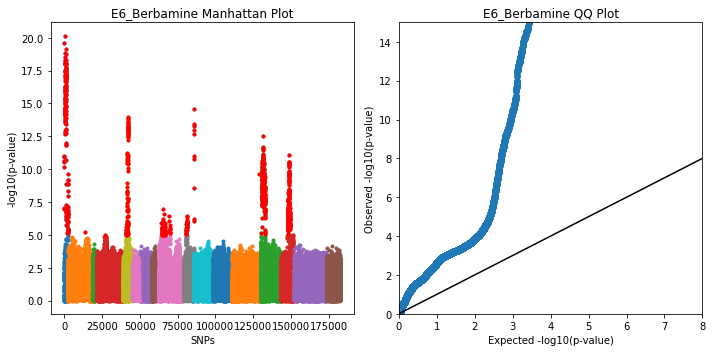

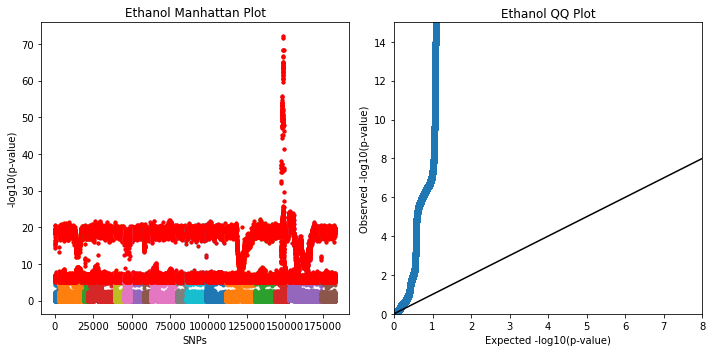

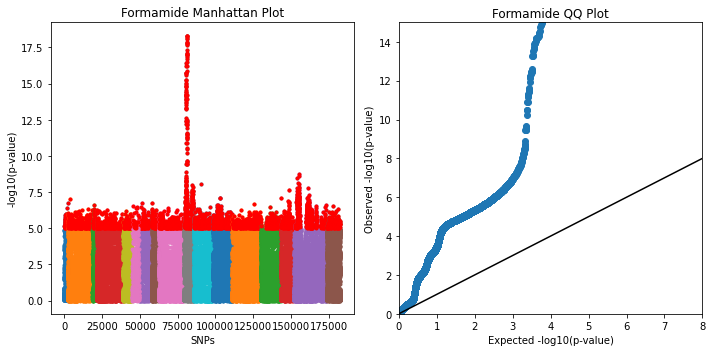

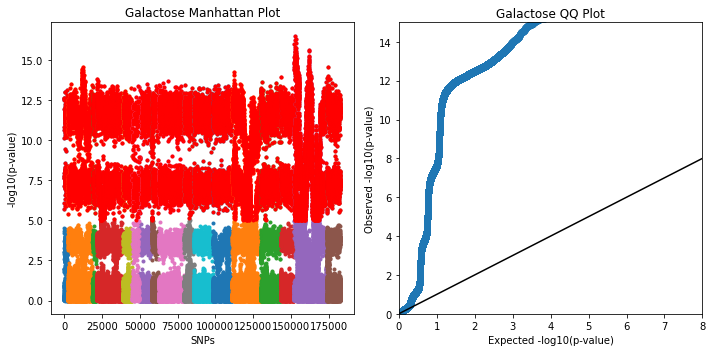

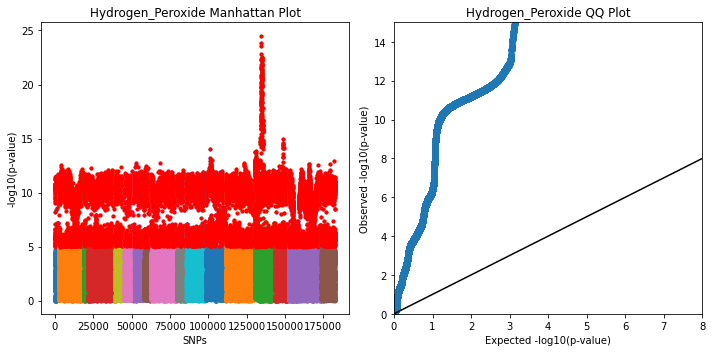

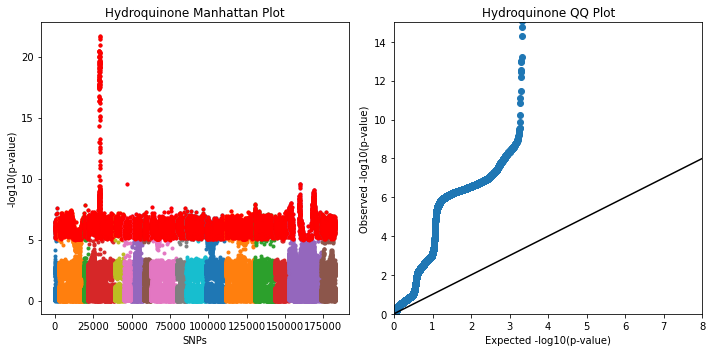

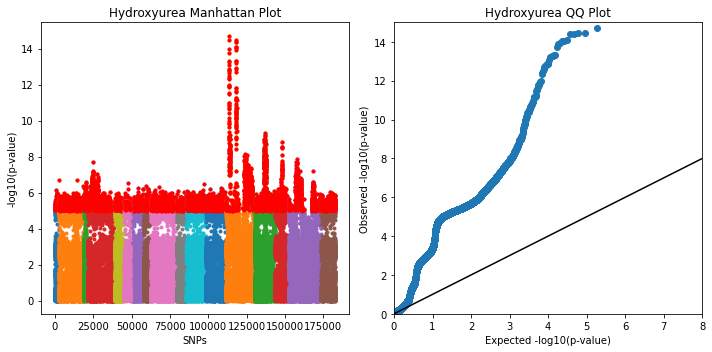

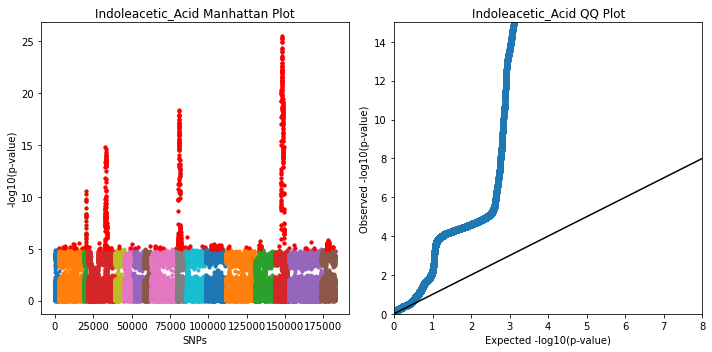

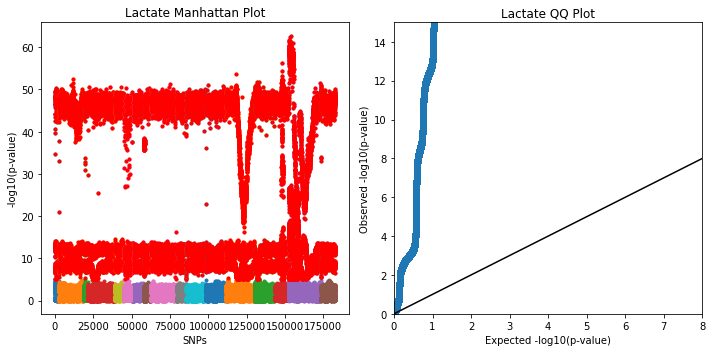

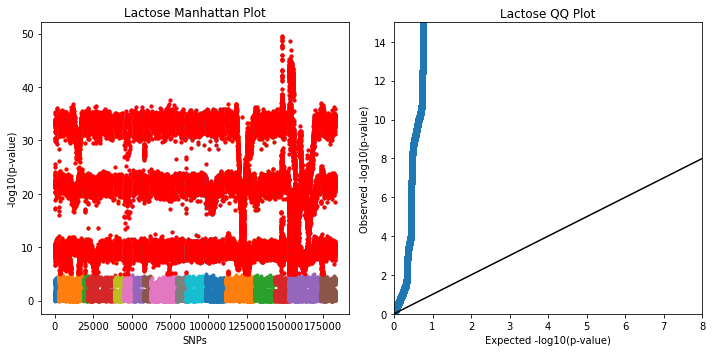

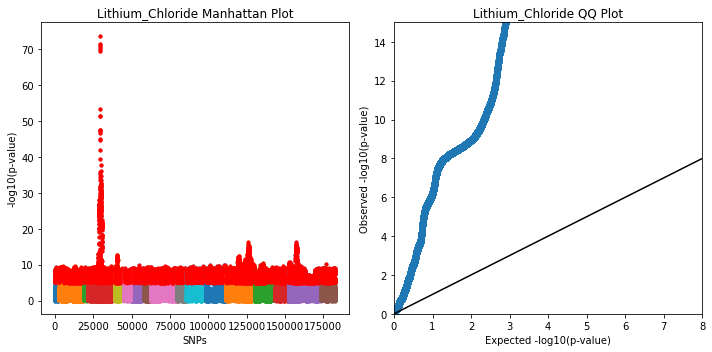

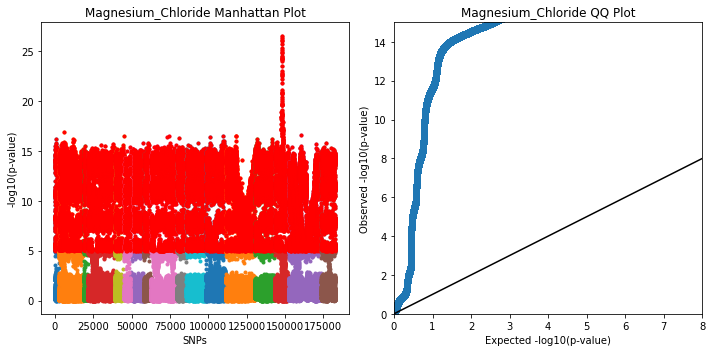

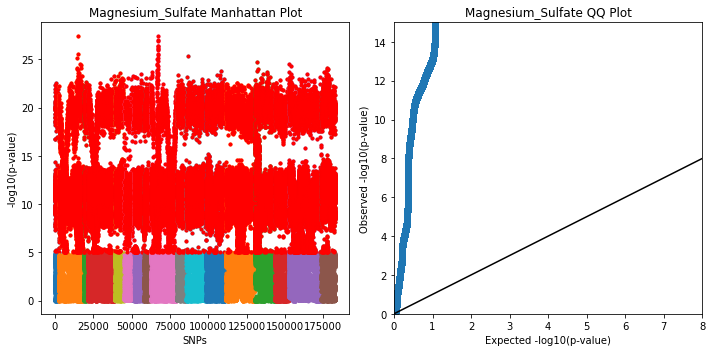

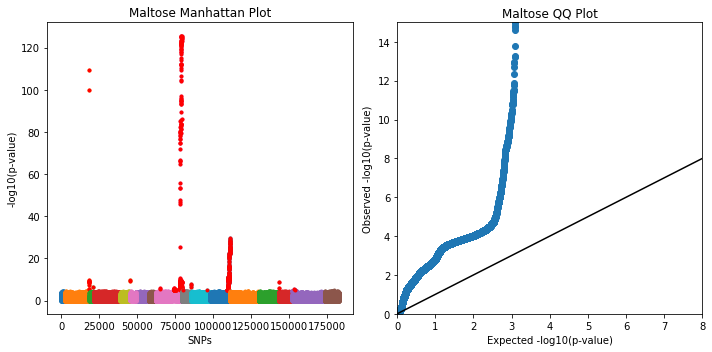

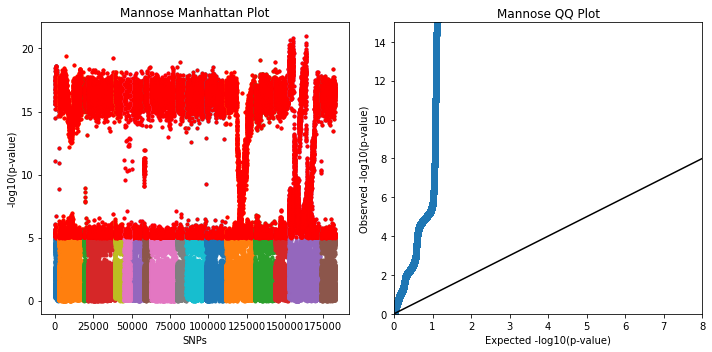

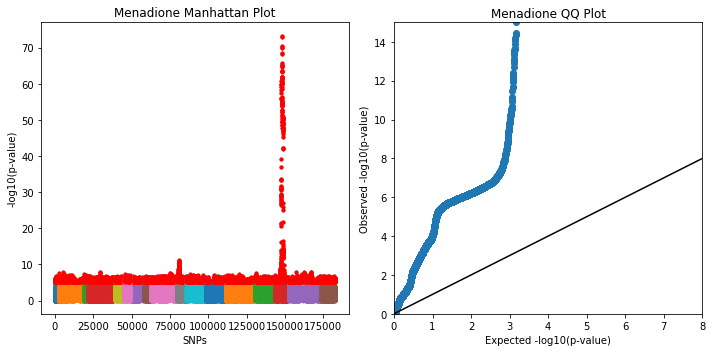

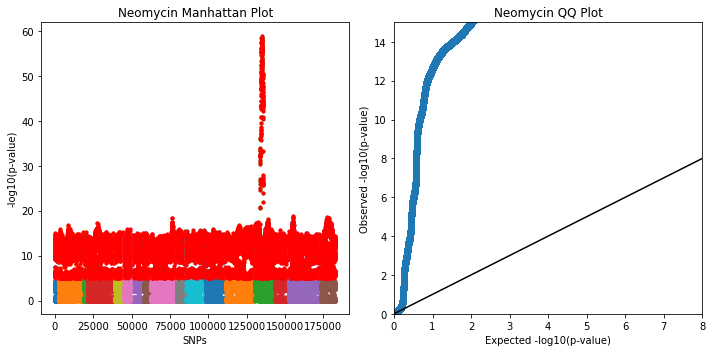

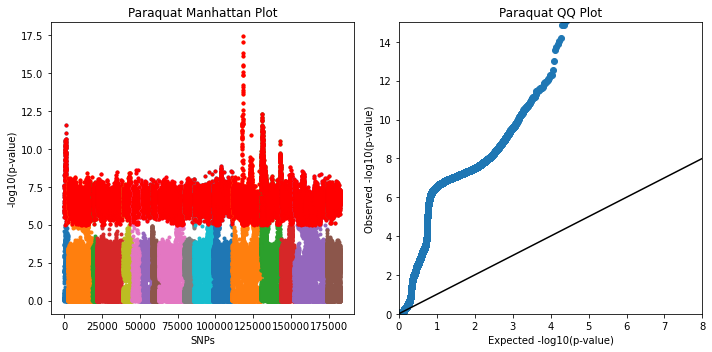

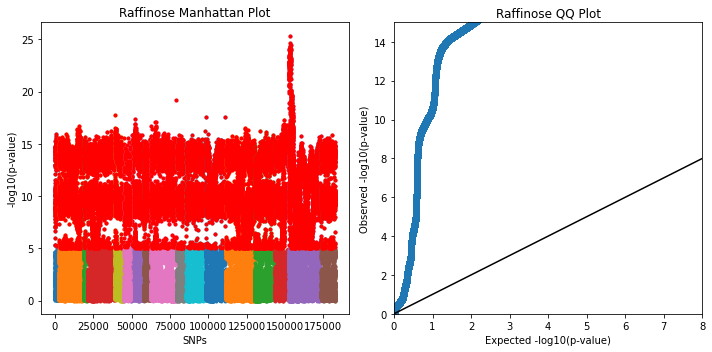

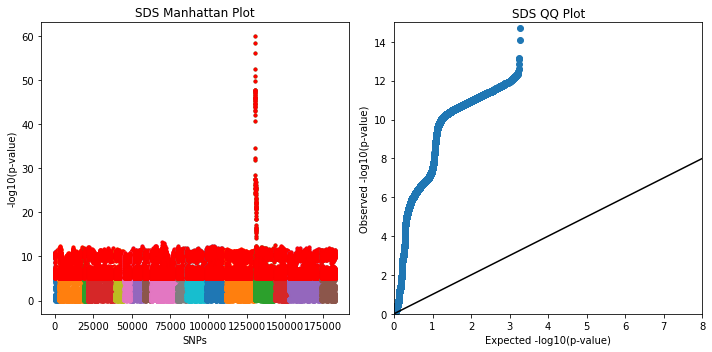

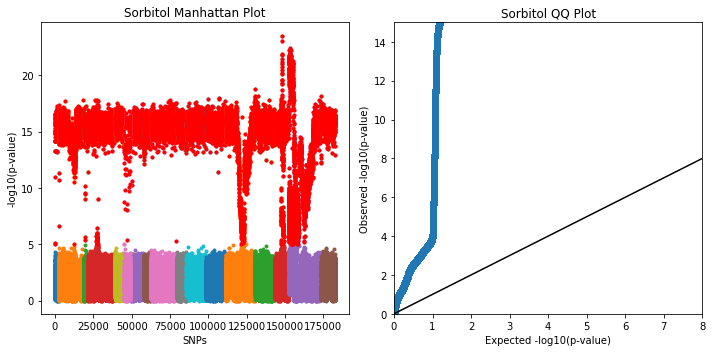

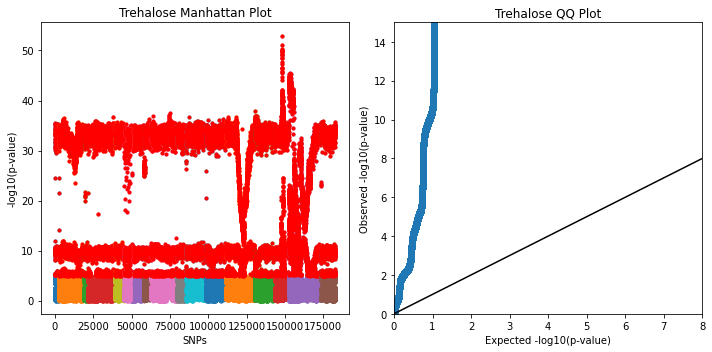

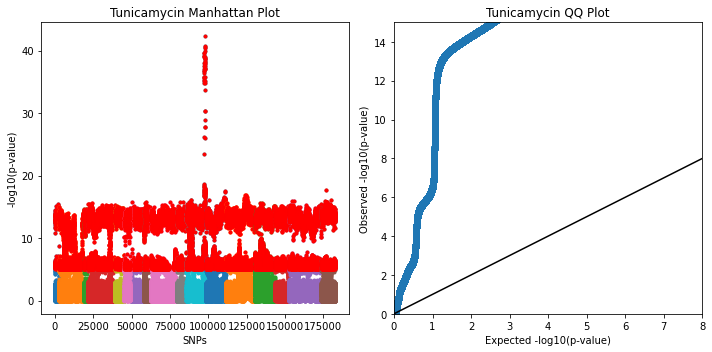

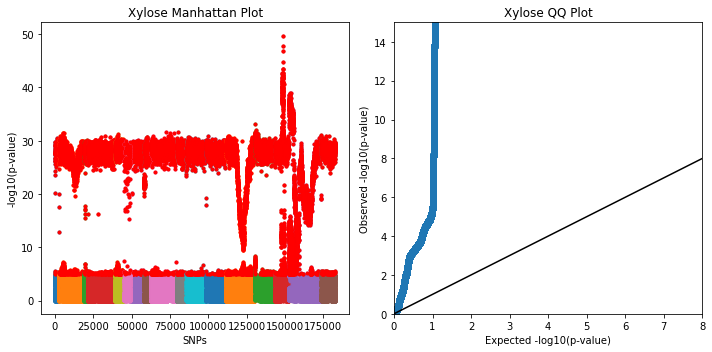

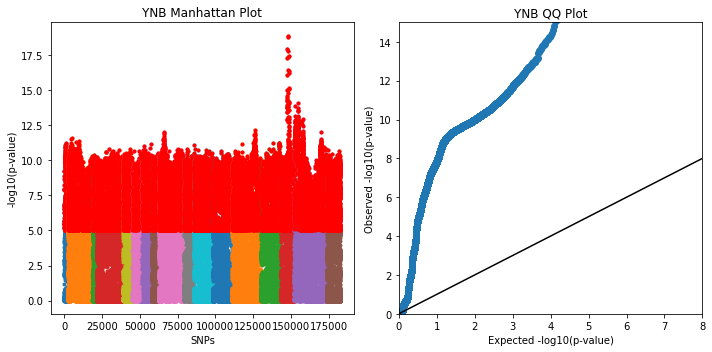

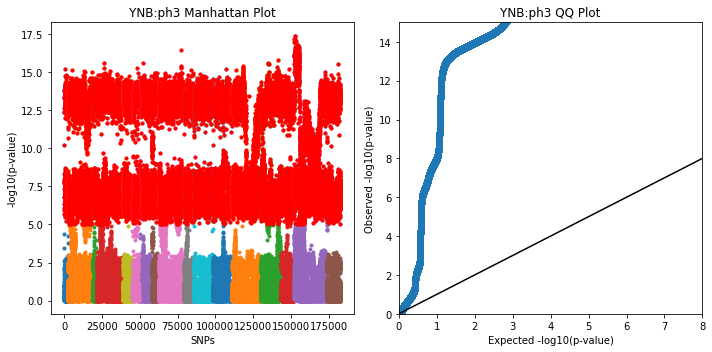

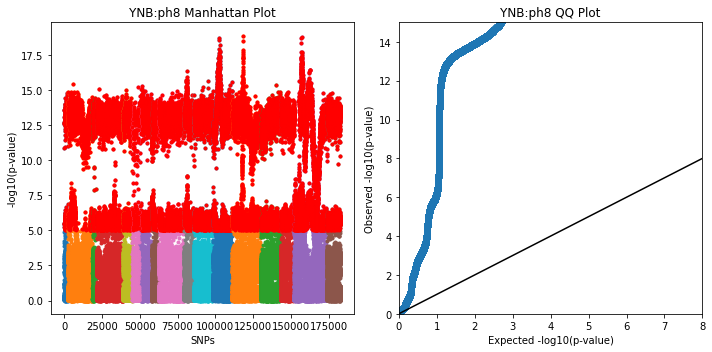

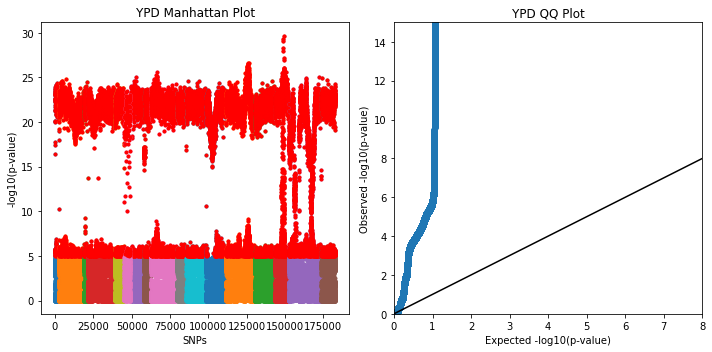

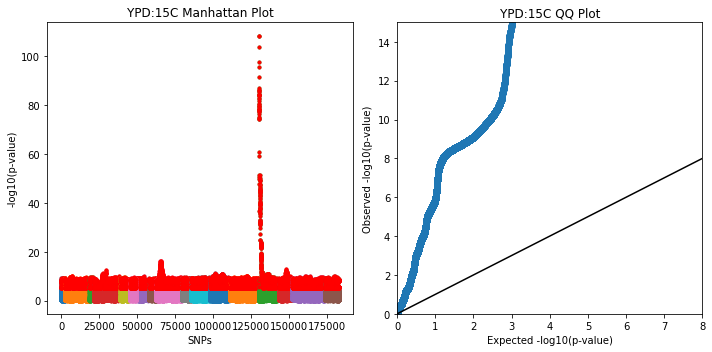

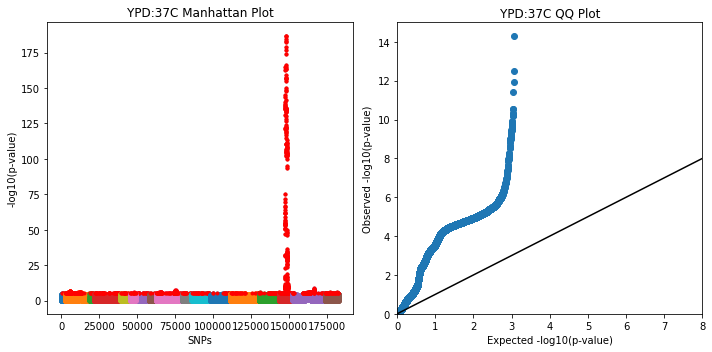

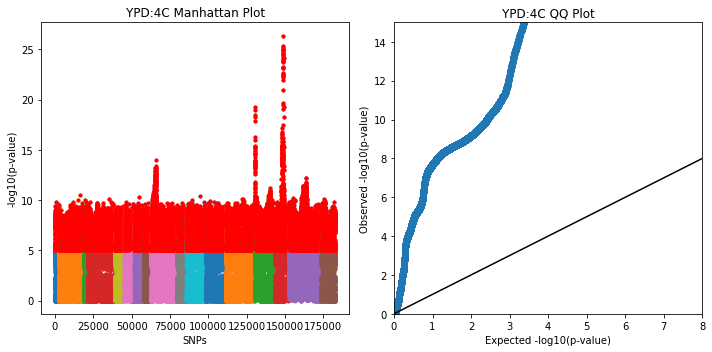

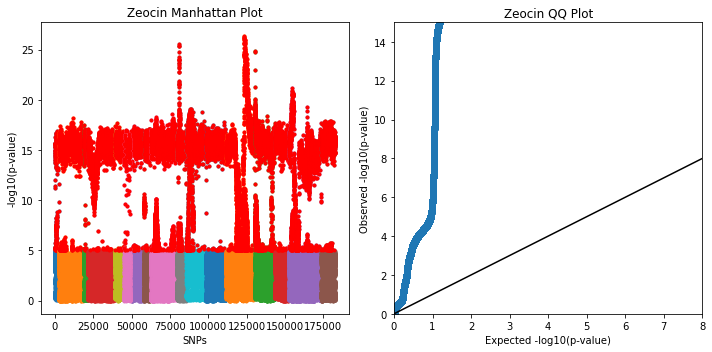

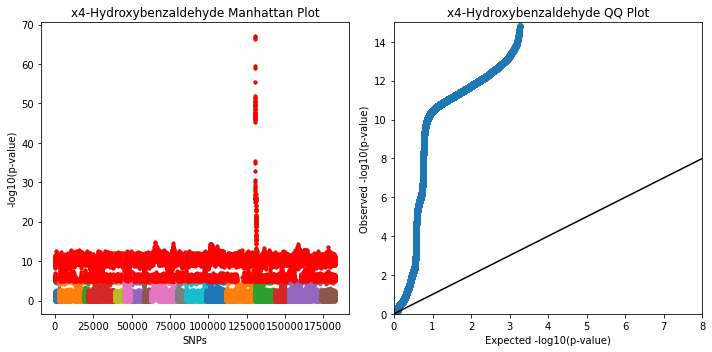

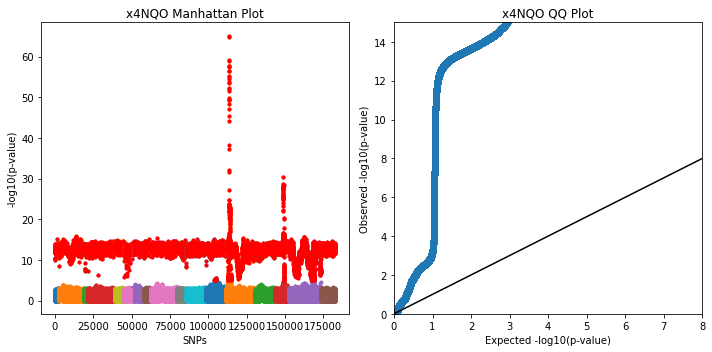

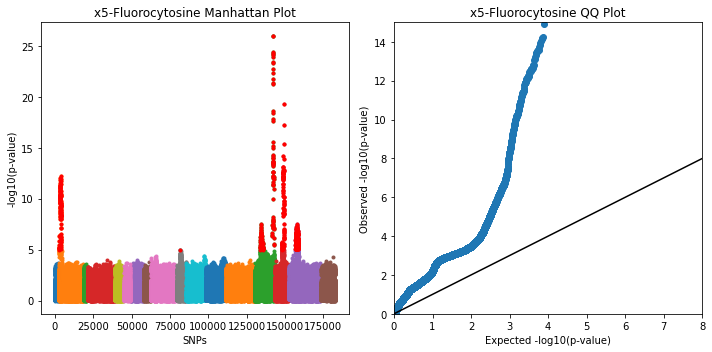

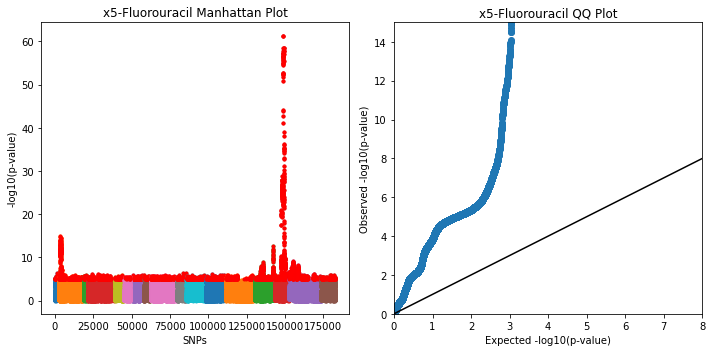

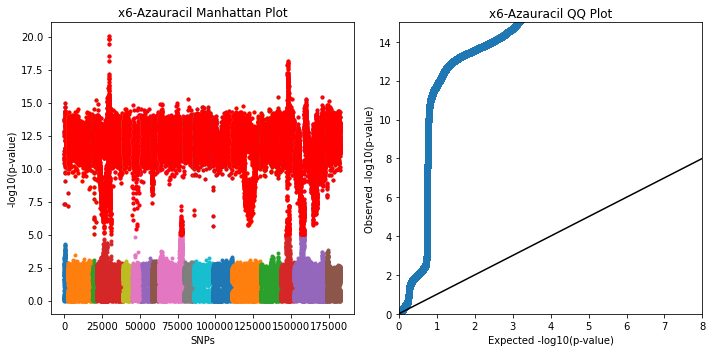

In [9]:
# Get list of all files in current directory
files = os.listdir()
files.sort()

# Change plot size
plt.rcParams["figure.figsize"] = [10, 5]

for file in files:
    
    # Iterate through all plink output files
    if "assoc.linear" in file:
        
        # Format GWAS data for Manhattan plot
        gwas_data = pd.read_csv(file, sep = "\s+")
        gwas_data['logP'] = -1 * np.log10(gwas_data['P'])
        gwas_data['snp_index'] = range(len(gwas_data))
        
        # Manhattan plot
        fig, (ax1, ax2) = plt.subplots(ncols = 2)
        for chr in chr_list:
            ax1.scatter(gwas_data["snp_index"][gwas_data["CHR"] == chr], 
                       gwas_data["logP"][gwas_data["CHR"] == chr], 
                       marker = '.')
            
            ax1.scatter(gwas_data["snp_index"][(gwas_data["CHR"] == chr) & (gwas_data["P"] < 1e-05)], 
                       gwas_data["logP"][(gwas_data["CHR"] == chr) & (gwas_data["P"] < 1e-05)], 
                       marker = '.', color = "red")
        
        ax1.set_title(file.split(".")[1] + " Manhattan Plot")
        ax1.set_xlabel("SNPs")
        ax1.set_ylabel("-log10(p-value)")
        
         # Format GWAS data for QQ plot
        gwas_sorted = gwas_data.sort_values(by = "P")
        gwas_sorted["uniform_points"] = range(0, len(gwas_sorted))
        gwas_sorted["uniform_pval"] = (gwas_sorted["uniform_points"] + 1) / len(gwas_sorted)
        gwas_sorted["uniform_logP"] = -1 * np.log10(gwas_sorted["uniform_pval"])
        
        # QQ plot
        ax2.scatter(gwas_sorted["uniform_logP"], gwas_sorted["logP"])
        ax2.plot([8, 0], [8, 0], color = "black")
        
        ax2.set_title(file.split(".")[1] + " QQ Plot")
        ax2.set_xlabel("Expected -log10(p-value)")
        ax2.set_ylabel("Observed -log10(p-value)")
        ax2.set_xlim([0, 8])
        ax2.set_ylim([0, 15])
        
        plt.tight_layout()
        plt.show()

## Visualize effect sizes for top associated SNP for cadmium chloride

In [10]:
# Identify top associated SNP for cadmium chloride
cc_data = pd.read_csv("plink.Cadmium_Chloride.assoc.linear", sep = "\s+")
cc_data_sorted = cc_data.sort_values(by = "P")
top_snp = cc_data_sorted.iloc[0]
top_snp

CHR         chrII
SNP             .
BP         795756
A1              C
TEST          ADD
NMISS         706
BETA       -5.762
STAT       -58.53
P        1.3e-270
Name: 18447, dtype: object

In [11]:
%%bash

# Get genotypes at top associated SNP
plink --vcf BYxRM_segs_saccer3.bam.simplified.vcf \
    --recodeA \
    --chr chrII \
    --allow-extra-chr \
    --from-bp  795756\
    --to-bp  795756\
    --out top_snp

PLINK v1.90p 64-bit (16 Jun 2020)              www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Note: --recodeA flag deprecated.  Use "--recode A ...".
Logging to top_snp.log.
Options in effect:
  --allow-extra-chr
  --chr chrII
  --from-bp 795756
  --out top_snp
  --recode A
  --to-bp 795756
  --vcf BYxRM_segs_saccer3.bam.simplified.vcf

16384 MB RAM detected; reserving 8192 MB for main workspace.
--vcf: top_snp-temporary.bed + top_snp-temporary.bim + top_snp-temporary.fam
written.
(15153 variants skipped.)
1 out of 1471 variants loaded from .bim file.
1056 people (0 males, 0 females, 1056 ambiguous) loaded from .fam.
Ambiguous sex IDs written to top_snp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 1056 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%

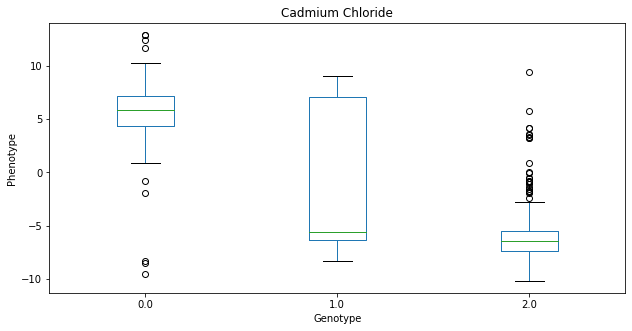

In [12]:
# Read in genotype data
geno_data = pd.read_csv("top_snp.raw", sep = " ")
geno_data["subject_id"] = geno_data["FID"].astype(str) + "_" + geno_data["IID"].astype(str)

# Merge with phenotype data
boxplot_data = pd.merge(geno_data, pheno_data, on = "subject_id")

# Create boxplot to visualize effect sizes
ax = boxplot_data.boxplot("Cadmium_Chloride", by = "._C", grid = False)

ax.set_title("Cadmium Chloride")
plt.suptitle("")
ax.set_xlabel("Genotype")
ax.set_ylabel("Phenotype")

plt.show()